# Analyse the candy-data to make a recommendation for the next product.

In [327]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [329]:
#Load the data
df = pd.read_csv(r"C:\Users\SAkela\lidl\candy-data.txt");
X = df.drop(["winpercent","competitorname"], 1)  #Feature Matrix
y = df["winpercent"]          #Target Variable

In [333]:
#Use the Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

c:\users\sakela\appdata\local\continuum\anaconda3\envs\pvnd_ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [334]:
#Using GridSearch to find the best parameters
param_grid = [
    {'n_estimators' : [3, 10, 20], 'max_features': [2,4,6,8,10]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [3, 4, 5]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 20], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

 - Using the *RandomForestRegressor* we can indicate the relative importance for each attribute

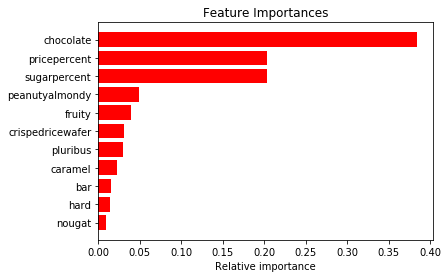

In [335]:
#Feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)

#Plotting the feature importances
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

 - From the above plot, we can see that chocolate, sugarpercent and pricepercent are the most important features. 
 - We also use peanutyalmondy, fruity and crispedricwafer to see which combination with chocolate would yield to best results

In [336]:
#Calculating the mean of sugarpercent and pricepercent
print("Sugar percent mean:", df["sugarpercent"].mean())
print("Price percent mean:", df["pricepercent"].mean())

Sugar percent mean: 0.4786470514588235
Price percent mean: 0.46888235249411764


### Making a test dataset
I made a test dataset to predict the *winpercent* for different combinations.
I used sugar and price percent above and below their mean value for various combinations of 
 - chocolate with peanutyalmondy
 - chocolate with crispedricewafer
 - chocolate with crispedricewafer and peanutyalomondy
 - fruity

In [337]:

X_test = [ [1, 0, 0, 0, 0, 1, 0, 0, 0, 0.75, 0.88], #chocolate, crispedricewafer, high sugar and high price
           [1, 0, 0, 0, 0, 1, 0, 0, 0, 0.22, 0.33], #chocolate, crispedricewafer, low sugar and low price
           [1, 0, 0, 0, 0, 1, 0, 0, 0, 0.22, 0.85], #chocolate, crispedricewafer, low sugar and high price
           [1, 0, 0, 0, 0, 1, 0, 0, 0, 0.95, 0.19], #chocolate, crispedricewafer, high sugar and low price
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0.62, 0.66], #chocolate, peanutyalmondy, crispedricewafer, high sugar and high price
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0.22, 0.26], #chocolate, peanutyalmondy, crispedricewafer, low sugar and low price
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0.72, 0.40], #chocolate, peanutyalmondy, crispedricewafer, high sugar and low price
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0.29, 0.80], #chocolate, peanutyalmondy, crispedricewafer, low sugar and high price
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0.79, 0.22], #chocolate, peanutyalmondy, high sugar and low price
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0.80, 0.92], #chocolate, peanutyalmondy, high sugar and high price
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0.32, 0.22], #chocolate, peanutyalmondy, low sugar and low price
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0.29, 0.92], #chocolate, peanutyalmondy, low sugar and high price
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0.35, 0.78], #fruity, low sugar and high price
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0.96, 0.84], #fruity, high sugar and high price
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0.22, 0.25], #fruity, low sugar and low price
           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0.94, 0.32], #fruity, high sugar and low price
          ] 


In [338]:
y_predict = forest_reg.predict(X_test)
np.array(y_predict)

array([55.3725293 , 49.1744422 , 51.1748882 , 54.0604225 , 68.5001705 ,
       57.5696002 , 66.2800857 , 64.4455051 , 63.8084823 , 63.330897  ,
       59.7238773 , 61.2660136 , 40.4393327 , 47.5600986 , 43.91079735,
       51.92330563])

In [339]:
for i in range(16):
    X_test[i].append(y_predict[i])

**From the results below, we can see that the maximum *winpercent* is for the combination of chocolate with peanutyalmody and crispedricewafer with a moderately high amount of sugar and price percent**

The results can be biased, as the dataset is pretty small and we can't have concrete results using such a dataset.

In [340]:
data = pd.DataFrame(X_test, columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
                                        'nougat', 'crispedricewafer', 'hard', 'bar', 
                                        'pluribus', 'sugarpercent','pricepercent', 
                                        'winpercent'])
data.sort_values(by=['winpercent'], ascending=False)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
4,1,0,0,1,0,1,0,0,0,0.62,0.66,68.500170
6,1,0,0,1,0,1,0,0,0,0.72,0.40,66.280086
7,1,0,0,1,0,1,0,0,0,0.29,0.80,64.445505
8,1,0,0,1,0,0,0,0,0,0.79,0.22,63.808482
9,1,0,0,1,0,0,0,0,0,0.80,0.92,63.330897
11,1,0,0,1,0,0,0,0,0,0.29,0.92,61.266014
10,1,0,0,1,0,0,0,0,0,0.32,0.22,59.723877
5,1,0,0,1,0,1,0,0,0,0.22,0.26,57.569600
0,1,0,0,0,0,1,0,0,0,0.75,0.88,55.372529
3,1,0,0,0,0,1,0,0,0,0.95,0.19,54.060423
